In [28]:
from app.drivers import CameraDriver as CD
from app.drivers import KDC101, JenaDriver
import numpy as np
import matplotlib.pyplot as plt

In [21]:
camera = CD({'exposure_time':500000})

In [22]:
camera.initialise()
camera.start_acquisition()

In [159]:
camera.shutdown()

In [29]:
idler_shut = KDC101('/dev/ttyUSB4', 'idler_shutter', tol=1e-4)
idler_shut.initialise({})
z_fine = JenaDriver('/dev/ttyUSB7', 'z_fine')
z_fine.initialise({})

In [133]:
idler_shut.set_parameters(20e-3)
while idler_shut._actuator.is_moving():
    sleep(0.01)

dark_img = np.array(camera.get_image())

idler_shut.set_parameters(0)
while idler_shut._actuator.is_moving():
    sleep(0.01)

img_list = []
_steps = 20
for step in np.linspace(0, 3, _steps):
    z_fine.set_parameters(step)
    new_img = np.array(camera.get_image(), dtype=np.float32)
    img_list.append(new_img)

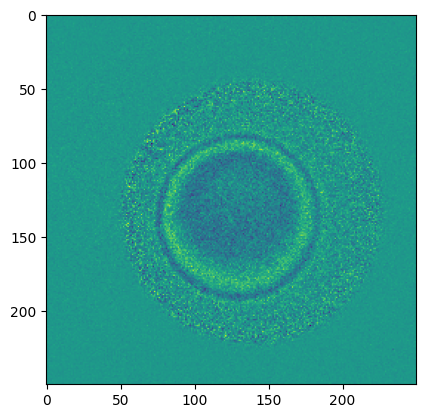

In [137]:
dark_img_fl =  dark_img.astype(np.float32)
img_arr = np.array(img_list, dtype=np.float32)

plt.imshow(img_arr[0] - dark_img_fl)
plt.show()

In [38]:
idler_shut = KDC101('/dev/ttyUSB4', 'idler_shutter', tol=1e-4)
idler_shut.initialise({})

In [39]:
idler_shut.get_position()

0.0

In [68]:
img_list = []
_steps = 20
for step in np.linspace(0, 3, _steps):
    z_fine.set_parameters(step)
    new_img = np.array(camera.get_image(), dtype=np.float32)
    img_list.append(new_img)

In [117]:
img_arr = np.array(img_list)
img_arr.shape

(20, 250, 250)

In [154]:
diff_arr = img_arr - dark_img_fl
diff_arr.shape

(20, 250, 250)

In [155]:
fft_diff_arr = np.fft.rfft2(img_arr, axes=[0])
fft_diff_arr.shape

(11, 250, 250)

In [156]:
vis = np.max(np.abs(fft_diff_arr[1:]), axis=0) / np.abs(fft_diff_arr[0])
vis2 = np.max(np.abs(fft_diff_arr[1:]), axis=0) / np.mean(np.abs(img_arr), axis=0)
#/ np.abs(fft_diff_arr[0, :, :])

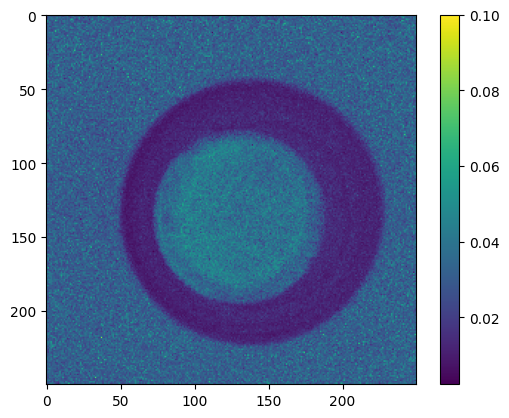

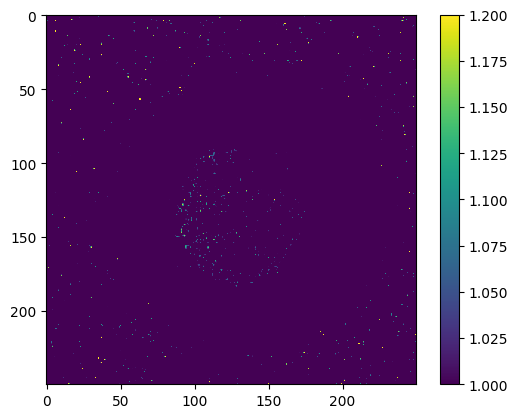

In [158]:
plt.imshow(vis, vmax=0.1)
plt.colorbar()
plt.show()


plt.imshow(vis2, vmin=1, vmax=1.2)
plt.colorbar()
plt.show()

# plt.imshow(vis[100:170, 100:160])
# plt.colorbar()

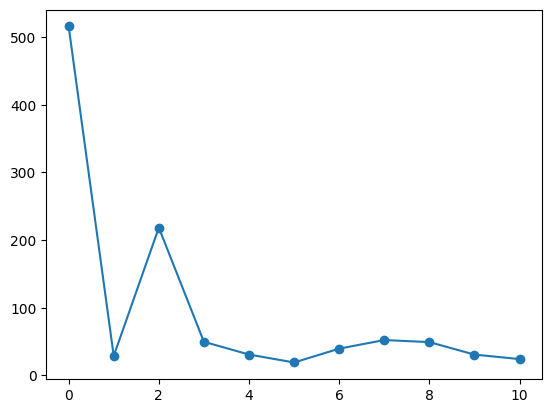

In [125]:
plt.plot(np.abs(fft_diff_arr[:, 150, 100]), 'o-')

In [94]:
from time import sleep
idler_shut.set_parameters(20e-3)
while idler_shut._actuator.is_moving():
    sleep(0.01)
idler_shut.set_parameters(0)

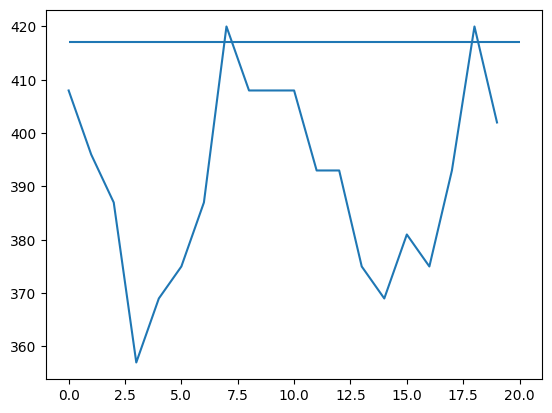

In [132]:
plt.plot(img_arr[:,150,100])
plt.hlines(dark_img_fl[150,100], xmin =0, xmax =20)

In [160]:
idler_shut.shutdown()

In [161]:
z_fine.shutdown()